In [2]:
# Frquent
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# ML
import sklearn
#import xgboost as xgb

In [3]:
# Load in the train and test datasets
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


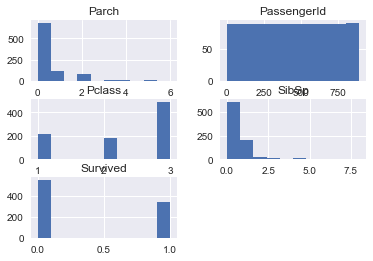

In [48]:
def exp_int_dist (train):
    flt_cols = train[train.dtypes[train.dtypes =='int64'].index]
    fig,ax = plt.subplots()
    flt_cols.hist(ax=ax)
    fig.savefig('Summary_Dataexplore_col_int_dist.pdf')
exp_int_point(train)

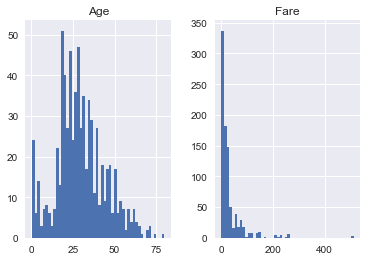

In [50]:
def exp_float_dist (train):
    flt_cols = train[train.dtypes[train.dtypes == 'float'].index]
    fig,ax = plt.subplots()
    flt_cols.hist(bins=50,ax=ax)
    fig.savefig('Summary_Dataexplore_col_float_dist.pdf')
exp_float_dist (train)

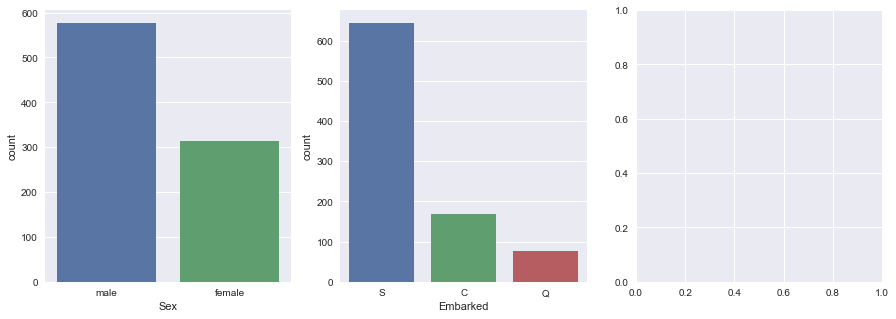

In [60]:
def exp_cate (train):
    cate= train[train.dtypes[train.dtypes == 'object'].index]
    a = cate.isnull().sum()
    b = cate.apply(lambda x:( x.value_counts()>0).sum())
    cate_sum=pd.concat([a,b],axis=1)
    cate_sum.columns=['miss_ct','unq_ct']
    cate_toplot_cols = train[cate_sum['unq_ct'][(cate_sum['unq_ct']<10)].index]
    shapedf = cate_toplot_cols.shape
    nbcol = shapedf[1]
    nbrow = shapedf[0]
    width = 3
    if nbcol < width:
        fig,ax = plt.subplots(1,width,figsize=(5*width,5*(nbcol/3+1)))
        for i,col in enumerate(list(cate_toplot_cols.columns.values)):
            sns.countplot(train[col].dropna(),ax=ax[i%width]) 
    else:
        fig,ax = plt.subplots(nbcol/width+1,width,figsize=(5*(nbcol/3+1),5))
        for i,col in enumerate(list(cate_toplot_cols.columns.values)):
            sns.distplot(train[col].dropna(),ax=ax[i/width,i%width]) 
    fig.savefig('Summary_Dataexplore_col_cate_dist.pdf')
    return cate_sum
cate_sum = exp_cate (train)

In [68]:
# outlier
# get test set
from sklearn.model_selection import ShuffleSplit
# Processing missing value dropna(), drop(), fillna()
## 1. what represent missing value 2. strategy to impute
from sklearn.preprocessing import Imputer  # strategy= 'median'/'mean'/'most_frequent'
imputer = Imputer(strategy="median") 


# handle categorical Attributes: stirng -> number, number -> onehot, string -> onehot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
t = train['Embarked'].dropna()
encoder = LabelBinarizer(sparse_output=True)
encoded = encoder.fit_transform(t)
encoded

# Custom Transformer
from sklearn.base import BaseEstimator, TransformerMixin

# Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Pipeline
from sklearn.pipeline import Pipeline, FeatureUnion 

# GridSearch
from sklearn.model_selection import GridSearchCV 

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       [nan],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

SyntaxError: invalid syntax (<ipython-input-78-716a863a66de>, line 1)

In [72]:
from sklearn.pipeline import Pipeline, FeatureUnion

<1x891 sparse matrix of type '<type 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>